In [1]:
import cv2 #############ENDED
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

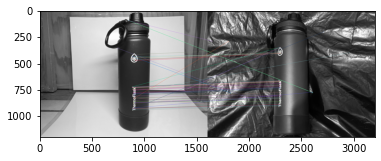

(<matplotlib.image.AxesImage at 0x1bfe1187cf8>, None)

In [2]:
img1 = cv2.imread('../Images/train/bottle/bottle_1.jpg')  
img2 = cv2.imread('../Images/test/bottle/bottle_1.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.ORB_create(nfeatures=1000)

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

In [3]:
import cv2##################ENDED########
import numpy as np
import os

path = '../ORB_Img/ImagesQuery'
orb = cv2.ORB_create(nfeatures=1000)

images = []
classNames = []
myList = os.listdir(path)
print(myList)
print('Total Classes Detected',len(myList))
for cl in myList:
    imgCur = cv2.imread(f'{path}/{cl}',0)
    images.append(imgCur)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

def findDes(images):
    desList=[]
    for img in images:
        kp,des = orb.detectAndCompute(img,None)
        desList.append(des)
    return desList

def findID(img, desLIst, thres=15):
    kp2,des2 = orb.detectAndCompute(img,None)
    bf = cv2.BFMatcher()
    matchList=[]
    finalVal = -1
    try:
        for des in desList:
            matches = bf.knnMatch(des,des2,k=2)
            good = []
            for m,n in matches:#casi fuerza bruta
                if m.distance < 0.73*n.distance:#75
                    good.append([m])
            matchList.append(len(good))
    except:
        pass    
    #print(matchList)
    if len(matchList)!=0:
        if max(matchList) > thres:
            finalVal = matchList.index(max(matchList))
    return finalVal        
    

desList = findDes(images)
print(len(desList))

cap = cv2.VideoCapture(0)

while True:
    succes, img2 = cap.read()
    imgOriginal = img2.copy()
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    id = findID(img2,desList)
    if id != -1:
        cv2.putText(imgOriginal,classNames[id],(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
    cv2.imshow('img2',imgOriginal)
    cv2.waitKey(1)


['bottle_1.jpg', 'bottle_10.jpg', 'bottle_11.jpg', 'bottle_12.jpg', 'bottle_2.jpg', 'bottle_3.jpg', 'bottle_4.jpg', 'bottle_5.jpg', 'bottle_6.jpg', 'bottle_7.jpg', 'bottle_8.jpg', 'bottle_9.jpg', 'FlipperTrainR.jpg', 'flipper_1.jpg', 'flipper_10.jpg', 'flipper_11.jpg', 'flipper_2.jpg', 'flipper_3.jpg', 'flipper_4.jpg', 'flipper_5.jpg', 'flipper_6.jpg', 'flipper_7.jpg', 'flipper_8.jpg', 'flipper_9.jpg', 'HaloR.jpg', 'halo_1.jpg', 'halo_10.jpg', 'halo_11.jpg', 'halo_12.jpg', 'halo_2.jpg', 'halo_3.jpg', 'halo_4.jpg', 'halo_5.jpg', 'halo_6.jpg', 'halo_7.jpg', 'halo_8.jpg', 'halo_9.jpg', 'minecraft_1.jpg', 'minecraft_2.jpg', 'minecraft_3.jpg', 'minecraft_4.jpg', 'minecraft_5.jpg', 'minecraft_6.jpg', 'minecraft_7.jpg', 'minecraft_8.jpg', 'minecraft_9.jpg', 'thermoIntR.png', 'xboxControlerQueryR.jpg', 'xbox_1.jpg', 'xbox_10.jpg', 'xbox_2.jpg', 'xbox_3.jpg', 'xbox_4.jpg', 'xbox_5.jpg', 'xbox_6.jpg', 'xbox_7.jpg', 'xbox_8.jpg', 'xbox_9.jpg']
Total Classes Detected 58
['bottle_1', 'bottle_10', '

# References
- https://www.youtube.com/watch?v=nnH55-zD38I